The output of the last layer of your CNN will output a probability that an image belongs to a given class. The last step in assessing the performance of your model is choosing the appropriate cut-off threshold for this probability value such that the model behaves in a way that is clinically optimal. Changing this threshold will change the true positive, false positive, false negative, and true negative rates, which we learned about in Lesson 1. This will, in turn, change the precision and recall of our model. Precision and recall are important concepts in clinical testing, and usually, one is optimized at the expense of another.

In this exercise, you'll be given a dataframe with ground truth labels as well as probabilities output by an algorithm that you developed to classify images as having a malignant tumor or not. Your job is to generate a Precision-Recall curve as well as an optional ROC AUC curve with the data in this dataframe.

Once you create these curves, choose two different thresholds: one that favors precision and one that favors recall. Use these thresholds to calculate two separate F1 scores. Then, also calculate the accuracy of your algorithm using these two different thresholds and think about why accuracy is or is not a good choice of performance statistic for your data.



In [18]:
# Importing Required Libraries for Data Analysis and Model Evaluation
# 
# This block imports essential libraries for data manipulation, visualization, and model evaluation:
# - numpy: For numerical operations and array handling.
# - pandas: For data processing and handling CSV files.
# - matplotlib.pyplot: For plotting and visualizing data.
# - sklearn.preprocessing.binarize: For thresholding array values.
# - sklearn.metrics: For evaluating model performance, including:
#   - roc_curve, auc: To compute and plot ROC curves and calculate the Area Under the Curve.
#   - precision_recall_curve, average_precision_score: To compute and plot Precision-Recall curves and calculate average precision.
#   - f1_score: To compute the F1 score, a balance between precision and recall.
#   - confusion_matrix: To compute the confusion matrix (ex: TP, TN, FP, FN) for classification results.

%matplotlib inline
import numpy as np       # linear algebra
import pandas as pd      # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import binarize

from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, f1_score, confusion_matrix

In [ ]:
# This block reads a CSV file named 'performances.csv' into a pandas DataFrame called 'performances'.
# The CSV file is expected to contain two columns:
#   - 'ground_truth': the actual class labels for each sample (e.g., 0 for negative, 1 for positive/malignant).
#   - 'probability': the predicted probability output by your model for each sample (i.e., the model's confidence that the sample belongs to the positive class).
# This DataFrame is then used for further analysis, such as plotting ROC/PR curves and calculating metrics.

performances = pd.read_csv('performances.csv')

In [19]:
performances.head()

,ground_truth,probability
0,1,0.99
1,1,0.98
2,1,0.97
3,1,0.96
4,1,0.95


### Exercise Solution

In [ ]:
# Utility Functions for Model Evaluation and Visualization
# 
# This block defines helper functions for evaluating and visualizing the performance of classification models using matplotlib and scikit-learn:
# 
# - plot_roc_curve(t_y, p_y): Plots the Receiver Operating Characteristic (ROC) curve using true labels (t_y) and predicted probabilities (p_y). 
# - Utilizes sklearn's roc_curve and auc to compute the curve and area under the curve.
# - plot_precision_recall_curve(t_y, p_y): Plots the Precision-Recall curve using true labels (t_y) and predicted probabilities (p_y). 
# - Uses sklearn's precision_recall_curve and average_precision_score.
# - calc_f1(prec, recall): Calculates the F1 score given precision (prec) and recall (recall) values using the standard F1 formula.
#
# Inputs:
#   - t_y: Array-like, ground truth binary labels (0 or 1)
#   - p_y: Array-like, predicted probabilities for the positive class
#   - prec: Precision value (float)
#   - recall: Recall value (float)

# function to plot the roc_curve. You can utilize roc_curve and auc imported above
def plot_roc_curve(t_y, p_y):
    fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
    fpr, tpr, thresholds = roc_curve(t_y, p_y)
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % ('Pneumonia', auc(fpr, tpr)))
    c_ax.legend()
    c_ax.set_xlabel('False Positive Rate')
    c_ax.set_ylabel('True Positive Rate')
    
# function to plot the precision_recall_curve. You can utilize precision_recall_curve imported above
def plot_precision_recall_curve(t_y, p_y):
    fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
    precision, recall, thresholds = precision_recall_curve(t_y, p_y)
    c_ax.plot(recall, precision, label = '%s (AP Score:%0.2f)'  % ('Pneumonia', average_precision_score(t_y,p_y)))
    c_ax.legend()
    c_ax.set_xlabel('Recall')
    c_ax.set_ylabel('Precision')

# function to calculate the F1 score
def  calc_f1(prec,recall):
    return 2*(prec*recall)/(prec+recall)

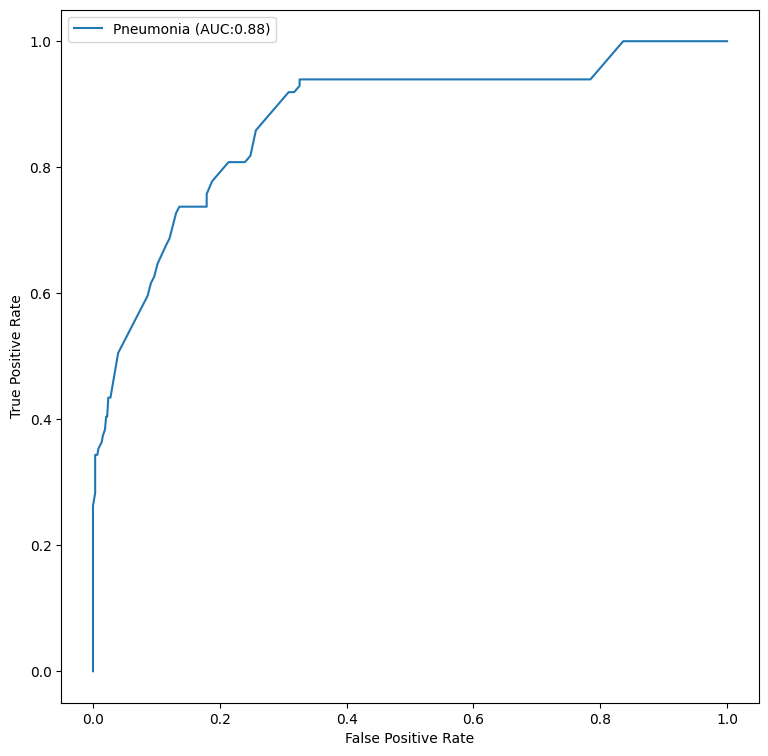

In [20]:
plot_roc_curve(performances['ground_truth'],performances['probability'])

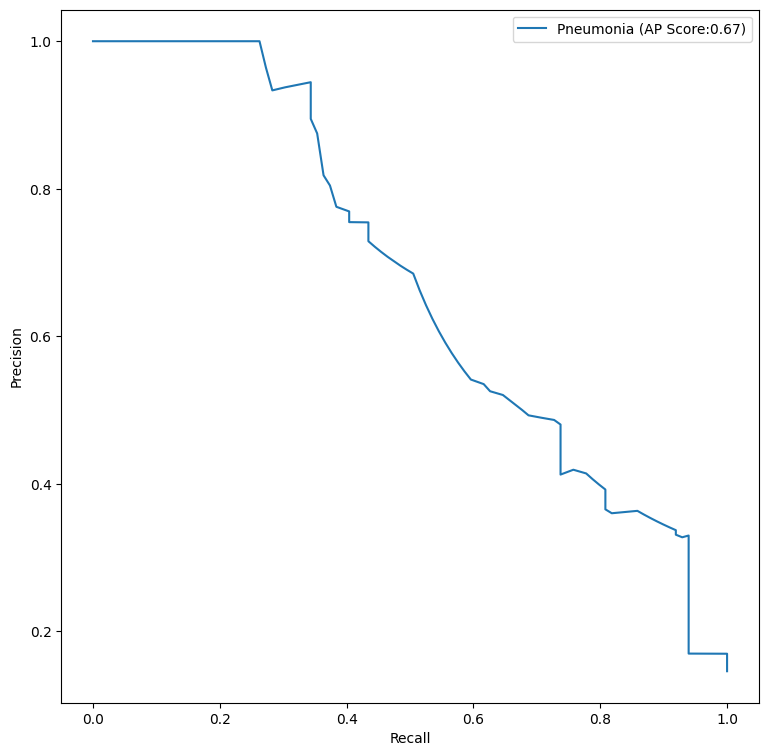

In [ ]:
# Plotting the Precision-Recall Curve with Matplotlib and scikit-learn
#
# This block demonstrates how to visualize the trade-off between precision and recall for a binary classifier using the `plot_precision_recall_curve` function.
# 
# - The function utilizes `precision_recall_curve` and `average_precision_score` from scikit-learn to compute precision, recall, and the average precision score.
# - Matplotlib (`plt`) is used for plotting the curve, providing a graphical representation of model performance at various thresholds.
# - This visualization helps in selecting an optimal threshold based on the desired balance between precision and recall, which is especially important in imbalanced datasets or clinical applications.

plot_precision_recall_curve(performances['ground_truth'],performances['probability'])

### Calculate F1 Score
Calculate F1 score for two different scenarios here, 
1. Choose a threshold that favors precision, 
2. Choose a threshold that favors recall

Print the precision, recall, threshold, and F1 score for each scenario. 

In [21]:
# Calculating Precision-Recall Curve Using scikit-learn
# 
# This block demonstrates how to use scikit-learn's `precision_recall_curve` function to evaluate the performance of a binary classifier.
# - `precision_recall_curve` computes precision and recall values for different probability thresholds, helping to visualize the trade-off between these metrics.
# - The function returns three arrays: `precision`, `recall`, and `thresholds`, which can be used for further analysis or plotting.
# - This is particularly useful in imbalanced datasets or clinical settings where optimizing for precision or recall is important.

#
precision, recall, thresholds = precision_recall_curve(performances['ground_truth'],performances['probability'])

In [22]:
# Precision-Recall Threshold Selection and F1 Score Calculation
#
# This block demonstrates how to select a probability threshold that favors precision using numpy and scikit-learn.
# - numpy is used for efficient numerical operations, specifically to find the index where precision is closest to a target value (here, 0.8).
# - The code prints the precision, recall, threshold, and F1 score at this selected threshold.
# - calc_f1 is a custom function that computes the F1 score from precision and recall.
# This approach helps in understanding the trade-off between precision and recall at different thresholds, which is crucial for model evaluation in imbalanced or clinical datasets.

# Look at the threshold where precision is 0.8
precision_value = 0.8
idx = (np.abs(precision - precision_value)).argmin() 
print('Precision is: '+ str(precision[idx]))
print('Recall is: '+ str(recall[idx]))
print('Threshold is: '+ str(thresholds[idx]))
print('F1 Score is: ' + str(calc_f1(precision[idx],recall[idx])))

Precision is: 0.8043478260869565
Recall is: 0.37373737373737376
Threshold is: 0.79
F1 Score is: 0.5103448275862069


In [ ]:
# Precision-Recall Threshold Selection and F1 Score Calculation (Favoring Recall)
#
# This block demonstrates how to select a probability threshold that favors recall using numpy and scikit-learn.
# - numpy is used to efficiently find the index where recall is closest to a target value (here, 0.8).
# - The code prints the precision, recall, threshold, and F1 score at this selected threshold.
# - calc_f1 is a custom function that computes the F1 score from precision and recall.
# This approach helps in understanding the trade-off between precision and recall at different thresholds, which is crucial for model evaluation in imbalanced or clinical datasets.

# Look at the threshold where recall is 0.8
recall_value = 0.8
idx = (np.abs(recall - recall_value)).argmin() 
print('Precision is: '+ str(precision[idx]))
print('Recall is: '+ str(recall[idx]))
print('Threshold is: '+ str(thresholds[idx]))
print('F1 Score is: ' + str(calc_f1(precision[idx],recall[idx])))

Precision is: 0.398989898989899
Recall is: 0.797979797979798
Threshold is: 0.39
F1 Score is: 0.531986531986532


**As we can see, the thresholds are really different for the two cases.**

--- 

### Examine the _accuracy_ under the two scenarios
Now look at what the _accuracy_ of our model would be using those two threshold values. **Hint, you can add a new column with value 0 or 1 as predictions based on the threshold you choose, then you can calculate accuracy using ground truth and the prediction you just made.**

Print the _accuracy_ in both the cases, and think about why accuracy really isn't a great performance statistic when evaluating and interpreting the utility of our models. 

In [ ]:
# Thresholding Model Probabilities and Creating Binary Predictions
#
# This block demonstrates how to convert model output probabilities into binary class predictions using pandas and numpy.
# - The pandas Series 'probs' contains the predicted probabilities for each sample.
# - Two thresholds (0.79 and 0.39) are chosen to favor precision and recall, respectively.
# - For each threshold, a boolean Series is created indicating whether each probability exceeds the threshold.
# - These boolean Series are then used to generate binary predictions (1 for positive, 0 for negative).
# - This approach allows for flexible evaluation of model performance at different operating points, which is critical in clinical and imbalanced data scenarios.

probs = performances['probability']
t1 = (probs > 0.79)
t2 = (probs > 0.39)

In [ ]:
# Thresholding Probabilities to Generate Binary Predictions Using pandas
#
# This block demonstrates how to convert model output probabilities into binary class predictions using pandas Series operations:
# - The variable `probs` contains the predicted probabilities for each sample.
# - Two thresholds (0.79 and 0.39) are chosen to favor precision and recall, respectively.
# - For each threshold, a boolean Series is created by comparing `probs` to the threshold.
# - The `.replace(True,1).replace(False,0)` method is used to convert boolean values to integer class labels (1 for positive, 0 for negative).
# - This approach allows for flexible evaluation of model performance at different operating points, which is critical in clinical and imbalanced data scenarios.
#

t1 = t1.replace(True,1).replace(False,0)
t2 = t2.replace(True,1).replace(False,0)

In [ ]:
# Comparing Model Predictions to Ground Truth Using pandas
#
# This block demonstrates how to compare model predictions to ground truth labels using pandas Series operations:
# - The variables `t1` and `t2` are pandas Series containing binary predictions (0 or 1) generated using two different probability thresholds.
# - The ground truth labels are stored in the 'ground_truth' column of the `performances` DataFrame.
# - The comparison `(t1 == performances['ground_truth'])` and `(t2 == performances['ground_truth'])` produces boolean Series (`compare_t1` and `compare_t2`), where each value is True if the prediction matches the ground truth and False otherwise.
# - These boolean Series are useful for calculating accuracy and other evaluation metrics by counting the number of correct predictions.
#

compare_t1 = (t1 == performances['ground_truth'])
compare_t2 = (t2 == performances['ground_truth'])

In [ ]:
# Calculating Model Accuracy at a Specific Threshold Using pandas
#
# This block demonstrates how to compute the accuracy of a binary classifier at a chosen probability threshold using pandas:
# - The variable `compare_t1` is a pandas Series of boolean values, where each entry is True if the model's prediction (using threshold 1) matches the ground truth, and False otherwise.
# - The expression `compare_t1[compare_t1]` selects all True values, representing correct predictions.
# - The length of this filtered Series gives the number of correct predictions.
# - Dividing by the total number of samples (`len(performances)`) yields the accuracy at threshold 1.
# - The result is printed to provide a quantitative measure of model performance at this threshold.
#

print('Accuracy at threshold 1: ' + str(len(compare_t1[compare_t1])/len(performances)))

Accuracy at threshold 1: 0.8954344624447718


In [ ]:
# Calculating Model Accuracy at a Second Threshold Using pandas
#
# This block demonstrates how to compute the accuracy of a binary classifier at a second chosen probability threshold using pandas:
# - The variable `compare_t2` is a pandas Series of boolean values, where each entry is True if the model's prediction (using threshold 2) matches the ground truth, and False otherwise.
# - The expression `compare_t2[compare_t2]` selects all True values, representing correct predictions.
# - The length of this filtered Series gives the number of correct predictions.
# - Dividing by the total number of samples (`len(performances)`) yields the accuracy at threshold 2.
# - The result is printed to provide a quantitative measure of model performance at this threshold.

print('Accuracy at threshold 2: ' + str(len(compare_t2[compare_t2])/len(performances)))

Accuracy at threshold 2: 0.801178203240059


This notebook guides you through evaluating the performance of a convolutional neural network (CNN) for binary image classification, specifically for detecting malignant tumors. It begins by importing necessary libraries and loading a dataset containing ground truth labels and model-predicted probabilities. The workflow includes visualizing model performance using ROC and Precision-Recall curves, then selecting two probability thresholds: one that favors precision and another that favors recall. For each threshold, the notebook calculates and prints the corresponding precision, recall, threshold value, and F1 score. It then generates binary predictions at these thresholds and computes the model's accuracy in both scenarios, highlighting why accuracy alone may not be a sufficient metric for clinical model evaluation, especially when balancing the trade-off between precision and recall is crucial.